## CARET

![gather](fig/caret.jpg "title-1")

**CARET** is a package that we are going to use extensively in the next lessons. It provides a unified framework to build predictive models leveraging on the large list of packages belonging to the **R** ecosystem. 

Each one of these packages has its particular interface and to use it you have to adapt your code to this interface.  

**CARET** provides a standard interface with these packages and you have only to adapt your code to this unique interface: if you use **CARET** and you want to change the statistical methods / implementation used by your code, with **CARET** you should only have to change some parameters and your code will work out-of-the-box.

To use this package you have simply have to:

In [1]:
library(caret)    
source("src/lib.R")

Loading required package: lattice
Loading required package: ggplot2


You can retrieve all the models supported by **CARET** using the **getModelInfo** function, 

In [2]:
models <- getModelInfo()
sprintf("Number of models: %d", names(models) %>% length)
sprintf("Supported Models: %s", names(models) %>% paste(collapse = ", "))

[1] "Number of models: 237"

[1] "Supported Models: ada, AdaBag, AdaBoost.M1, adaboost, amdai, ANFIS, avNNet, awnb, awtan, bag, bagEarth, bagEarthGCV, bagFDA, bagFDAGCV, bam, bartMachine, bayesglm, binda, blackboost, blasso, blassoAveraged, bridge, brnn, BstLm, bstSm, bstTree, C5.0, C5.0Cost, C5.0Rules, C5.0Tree, cforest, chaid, CSimca, ctree, ctree2, cubist, dda, deepboost, DENFIS, dnn, dwdLinear, dwdPoly, dwdRadial, earth, elm, enet, evtree, extraTrees, fda, FH.GBML, FIR.DM, foba, FRBCS.CHI, FRBCS.W, FS.HGD, gam, gamboost, gamLoess, gamSpline, gaussprLinear, gaussprPoly, gaussprRadial, gbm_h2o, gbm, gcvEarth, GFS.FR.MOGUL, GFS.LT.RS, GFS.THRIFT, glm.nb, glm, glmboost, glmnet_h2o, glmnet, glmStepAIC, gpls, hda, hdda, hdrda, HYFIS, icr, J48, JRip, kernelpls, kknn, knn, krlsPoly, krlsRadial, lars, lars2, lasso, lda, lda2, leapBackward, leapForward, leapSeq, Linda, lm, lmStepAIC, LMT, loclda, logicBag, LogitBoost, logreg, lssvmLinear, lssvmPoly, lssvmRadial, lvq, M5, M5Rules, manb, mda, Mlda, mlp, mlpKerasDecay, mlpKerasDecayCost, mlpKerasDropout, mlpKerasDropoutCost, mlpML, mlpSGD, mlpWeightDecay, mlpWeightDecayML, monmlp, msaenet, multinom, mxnet, mxnetAdam, naive_bayes, nb, nbDiscrete, nbSearch, neuralnet, nnet, nnls, nodeHarvest, null, OneR, ordinalNet, ORFlog, ORFpls, ORFridge, ORFsvm, ownn, pam, parRF, PART, partDSA, pcaNNet, pcr, pda, pda2, penalized, PenalizedLDA, plr, pls, plsRglm, polr, ppr, PRIM, protoclass, qda, QdaCov, qrf, qrnn, randomGLM, ranger, rbf, rbfDDA, Rborist, rda, regLogistic, relaxo, rf, rFerns, RFlda, rfRules, ridge, rlda, rlm, rmda, rocc, rotationForest, rotationForestCp, rpart, rpart1SE, rpart2, rpartCost, rpartScore, rqlasso, rqnc, RRF, RRFglobal, rrlda, RSimca, rvmLinear, rvmPoly, rvmRadial, SBC, sda, sdwd, simpls, SLAVE, slda, smda, snn, sparseLDA, spikeslab, spls, stepLDA, stepQDA, superpc, svmBoundrangeString, svmExpoString, svmLinear, svmLinear2, svmLinear3, svmLinearWeights, svmLinearWeights2, svmPoly, svmRadial, svmRadialCost, svmRadialSigma, svmRadialWeights, svmSpectrumString, tan, tanSearch, treebag, vbmpRadial, vglmAdjCat, vglmContRatio, vglmCumulative, widekernelpls, WM, wsrf, xgbDART, xgbLinear, xgbTree, xyf"

**WOW** 238 models! Note that not all these models are implemented in **CARET** but the majority is implemented in an external library and you have to install the related package if you want to use it. The result of **getModelInfo** can be used to find which package you have to install to use a particular method:

In [3]:
models$lm$label
models$lm$library

[1] "Linear Regression"

NULL

In [4]:
models$kknn$label
models$kknn$library

[1] "k-Nearest Neighbors"

[1] "kknn"

So, if we want to use 'k-Nearest Neighbors' model we have to first install the **kknn** package (in the binder image we've already installed it!). On the contrary, if we want to use **Linear Regression** we don't have to install anything (**CARET** uses the standard R function **lm**)

Ok nice, but how to fit a model with **CARET**?

In [5]:
train(mpg ~ cyl, mtcars, method = "lm")

Linear Regression 

32 samples
 1 predictor

No pre-processing
Resampling: Bootstrapped (25 reps) 
Summary of sample sizes: 32, 32, 32, 32, 32, 32, ... 
Resampling results:

  RMSE      Rsquared   MAE     
  3.214875  0.7408898  2.552587

Tuning parameter 'intercept' was held constant at a value of TRUE

The model output is quite verbose, here we focus only on the last line...what is a **tuning parameter**? In a nutshell, it's a parameter on which **CARET** will try to optimize the fitted model (we'll see more on this topic in the second lesson).

Each model supported by **CARET** has its **tuning parameters**. To see which ones are the supported parameters you can explore the output of getModelInfo(). Here the **tuning parameters** of the *Linear Regression*

In [6]:
models$lm$parameters

parameter,class,label
intercept,logical,intercept


Only one parameter (*intercept*), with a logical (*True* or *False*) class that controls (as the name suggests) the value of the intercept in the fitted model. To set the value of a **tuning parameter** you can use the *tuneGrid* parameter as follows:

In [7]:
train(mpg ~ cyl, mtcars, method = "lm", tuneGrid = data.frame(intercept = T))$finalModel


Call:
lm(formula = .outcome ~ ., data = dat)

Coefficients:
(Intercept)          cyl  
     37.885       -2.876  


In [8]:
train(mpg ~ cyl, mtcars, method = "lm", tuneGrid = data.frame(intercept = F))$finalModel


Call:
lm(formula = .outcome ~ 0 + ., data = dat)

Coefficients:
 cyl  
2.79  


Note that selecting the *finalModel* element of the *train* function result you can obtain the fitted model description.

Often the **tuning parameters** supported by **CARET** do not cover all the parameters of the underlying fitting procedure. If you want to use a parameter not covered by **CARET** you can put it directly in the *train* function. As example consider the *subset* parameter in the *lm* function, you can provide it to **CARET** as follows:

In [9]:
train(mpg ~ cyl, mtcars, method = "lm")$finalModel


Call:
lm(formula = .outcome ~ ., data = dat)

Coefficients:
(Intercept)          cyl  
     37.885       -2.876  


In [10]:
train(mpg ~ cyl, mtcars, method = "lm", subset = 1:10)$finalModel


Call:
lm(formula = .outcome ~ ., data = dat)

Coefficients:
(Intercept)          cyl  
     30.212       -1.697  


## TOY Datasets

In the following lessons we are going to use some simple datasets, that have been developed to challenge the simplest classification models.

These datasets will be generated leveraging some of the functions provided by the R package [**mlbench**](https://cran.r-project.org/web/packages/mlbench/index.html).

The full code to generate these datasets is contained the *.R* source file *src/lib.R*. Note that to correctly source this file you should set the working folder:

We can load all the datasets using the *get_full_dataset* function:

In [11]:
full_df <- get_full_dataset()
full_df %>% head

x,y,class,type
1.0000000,0.7867939,class_1,normal
0.2953566,0.2548078,class_2,normal
0.2543749,0.1833680,class_2,normal
0.2732002,0.0738039,class_2,normal
0.2738623,0.3743364,class_2,normal
0.1582638,0.4004009,class_2,normal


And we can plot its content using **ggplot**

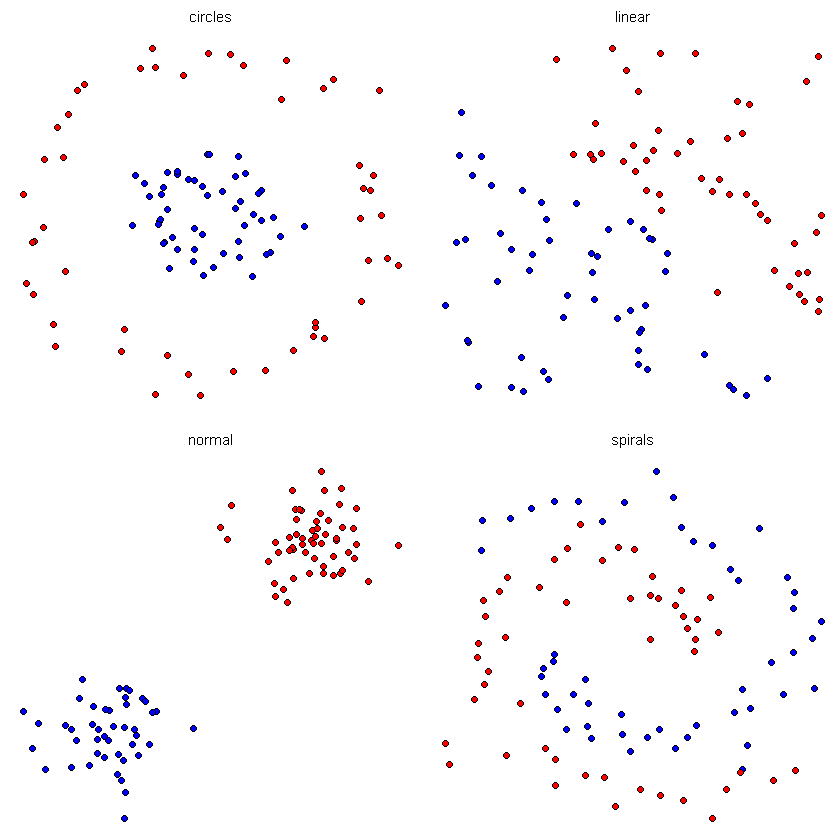

In [12]:
full_df %>% ggplot() + 
    geom_point(aes(x = x, y = y, fill = class), shape = 21) + 
    facet_wrap(~ type) + 
    theme_void() +
    labs(x = "", y = "") +
    scale_fill_manual(values = c("red", "blue")) + 
    guides(fill = F)